In [91]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

In [92]:
# Load training data
X_train = pd.read_csv('./X.csv', header=None)
weights_train = X_train.iloc[:, 0].values
heights_train = X_train.iloc[:, 1].values
categories_train = X_train.iloc[:, 2].values

In [93]:
# Define similarity function with weight preference
def similarity(x1, x2, weight_pref=0.7):
    """
    Calculate weighted Euclidean distance for similarity.
    A higher weight_pref favors weight over height.
    """
    weight_distance = (x1[0] - x2[0]) ** 2
    height_distance = (x1[1] - x2[1]) ** 2
    return np.exp(-weight_pref * weight_distance - (1 - weight_pref) * height_distance)

In [94]:
# Politeness factor: threshold for assigning categories
# This is a hypothetical adjustment value to favor 'average' over 'large'
politeness_threshold = 0.5

In [95]:
similarities_all = []

In [96]:
# Prediction function
def predict_category(test_point, X_train, y_train, weight_pref=0.9):
    """
    Predicts category based on training data and weighted similarity.
    """
    similarities = np.array([similarity(test_point, [weights_train[i], heights_train[i]], weight_pref)
                             for i in range(len(weights_train))])
    
    # Find the most similar training points
    best_matches = np.argsort(similarities)[::-1][:3]  # Taking top 3 matches
    # print best matches and their similarities
    print(test_point)
    print(best_matches)
    print(similarities[best_matches])
    similarities_all.extend(similarities[best_matches])
    avg_similarity = similarities[best_matches].mean()
    
    # Weighted voting with politeness adjustment
    category_votes = categories_train[best_matches]
    if avg_similarity < politeness_threshold and 3 in category_votes:
        return 2  # Assign 'average' if similarity is low and 'large' is among top matches
    else:
        return np.bincount(category_votes).argmax()  # Return most common category among best matches

In [97]:
# Load test data
X_test = pd.read_csv('./y.csv', header=None)
weights_test = X_test.iloc[:, 0].values
heights_test = X_test.iloc[:, 1].values

In [98]:
# Apply predictions to test data
predicted_categories = [predict_category([weights_test[i], heights_test[i]], X_train, categories_train)
                        for i in range(len(weights_test))]

[np.int64(74), np.int64(67)]
[66 64 55]
[0.02472353 0.011109   0.00020347]
[np.int64(69), np.int64(63)]
[12 11 38]
[0.03337327 0.02732372 0.011109  ]
[np.int64(92), np.int64(81)]
[52 72 71]
[3.22134029e-27 1.19120774e-29 5.36629584e-31]
[np.int64(64), np.int64(61)]
[35 19 40]
[0.67032005 0.67032005 0.082085  ]
[np.int64(66), np.int64(84)]
[49 41 32]
[2.26032941e-06 2.26032941e-06 2.26032941e-06]
[np.int64(76), np.int64(68)]
[66 64 58]
[1.         0.67032005 0.082085  ]
[np.int64(61), np.int64(58)]
[18 39 40]
[0.00744658 0.00030354 0.00020347]
[np.int64(64), np.int64(76)]
[32 41 23]
[0.16529889 0.16529889 0.082085  ]
[np.int64(68), np.int64(66)]
[38 30 24]
[0.40656966 0.40656966 0.36787944]
[np.int64(34), np.int64(61)]
[3 4 5]
[4.69900273e-57 5.88967743e-67 2.22343247e-77]
[np.int64(85), np.int64(61)]
[69 70 71]
[1.         0.36787944 0.20189652]


In [100]:
# Output results
for i, category in enumerate(predicted_categories):
    print(f"Test data point {i+1} (weight: {weights_test[i]}, height: {heights_test[i]}): Predicted category = {category}")

Test data point 1 (weight: 74, height: 67): Predicted category = 2
Test data point 2 (weight: 69, height: 63): Predicted category = 2
Test data point 3 (weight: 92, height: 81): Predicted category = 2
Test data point 4 (weight: 64, height: 61): Predicted category = 2
Test data point 5 (weight: 66, height: 84): Predicted category = 2
Test data point 6 (weight: 76, height: 68): Predicted category = 3
Test data point 7 (weight: 61, height: 58): Predicted category = 2
Test data point 8 (weight: 64, height: 76): Predicted category = 2
Test data point 9 (weight: 68, height: 66): Predicted category = 2
Test data point 10 (weight: 34, height: 61): Predicted category = 1
Test data point 11 (weight: 85, height: 61): Predicted category = 3


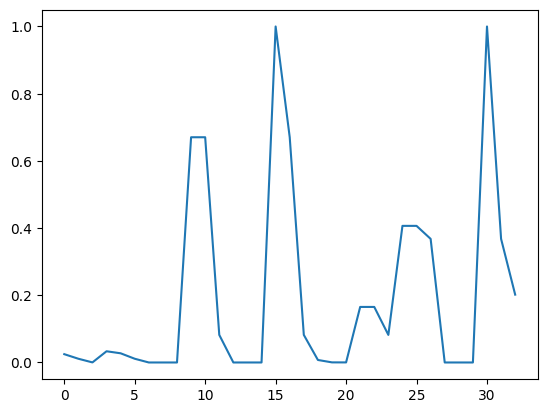

In [101]:
#plot the similarities_all
import matplotlib.pyplot as plt
plt.plot(similarities_all)
plt.show()
